#DEFINE

In [1]:
!git clone https://github.com/WongKinYiu/yolov7

fatal: destination path 'yolov7' already exists and is not an empty directory.


In [2]:
!pip install -r /content/yolov7/requirements.txt

In [3]:
import torch
import warnings
import os

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
warnings.filterwarnings('ignore')
torch.cuda.empty_cache()

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.device_count()

1

In [7]:
# Set the working directory to "Skin_Cancer"
os.chdir('/content')

# Verify the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /content


In [8]:
# !pip install ultralytics==8.0.196

In [9]:
from IPython.display import display, Image

In [10]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="nWr9KTX5ZS7RpXl1PycI")
project = rf.workspace("comvis-kuueo").project("skin_lesion_detection-bvzqy")
version = project.version(2)
dataset = version.download("yolov7")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin_Lesion_Detection-2 in yolov7pytorch:: 100%|██████████| 7012/7012 [00:01<00:00, 4410.15it/s]


In [12]:
# !pip install -U ultralytics
# print(torch.__version__)
# pip install --upgrade torch

In [14]:
!python /content/yolov7/train.py  --weights /content/yolov7.pt --cfg /content/yolov7/cfg/training/yolov7.yaml --data /content/Skin_Lesion_Detection-2/data.yaml --epochs 100 --img-size 224


2024-09-26 04:13:50.491933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 04:13:50.524330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 04:13:50.534009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 04:13:50.555337: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 04:13:52.049246: W tensorflow/compiler/tf2

In [19]:
!python /content/yolov7/test.py --weights /content/runs/train/exp2/weights/best.pt --data /content/Skin_Lesion_Detection-2/data.yaml --img-size 224


Namespace(weights=['/content/runs/train/exp2/weights/best.pt'], data='/content/Skin_Lesion_Detection-2/data.yaml', batch_size=32, img_size=224, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed

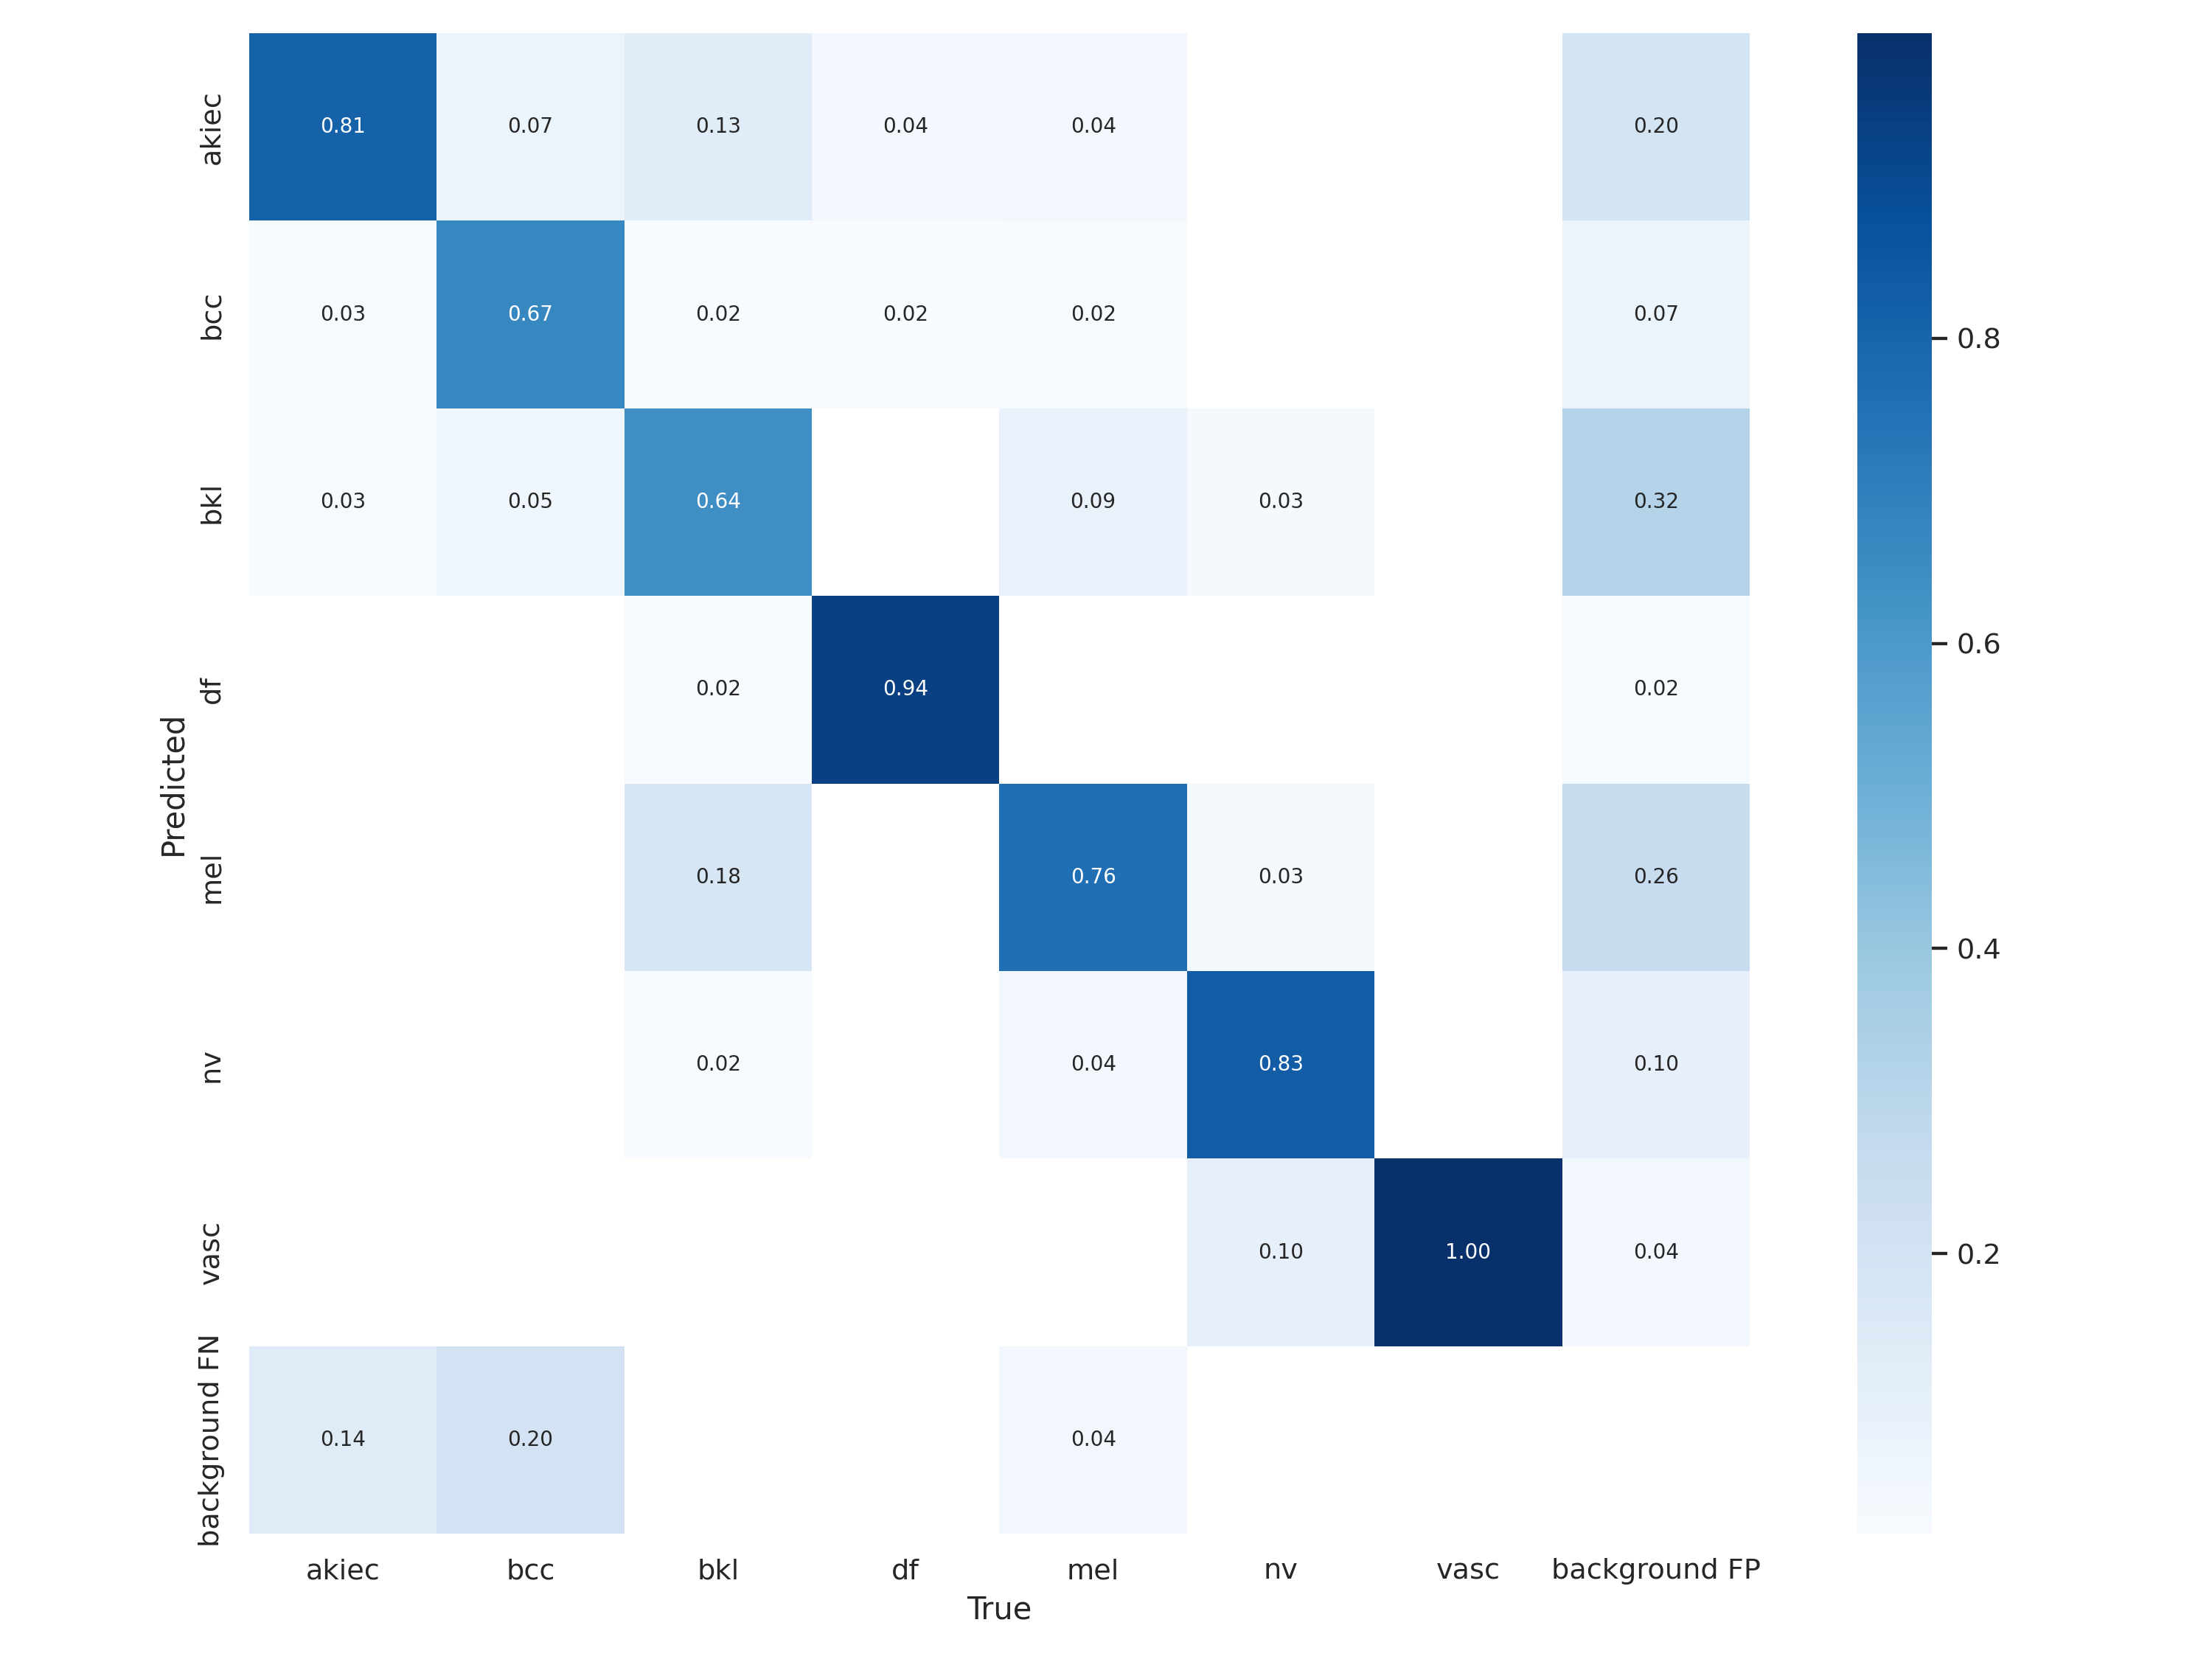

In [21]:
Image(filename=f'/content/runs/train/exp2/confusion_matrix.png', width=600)

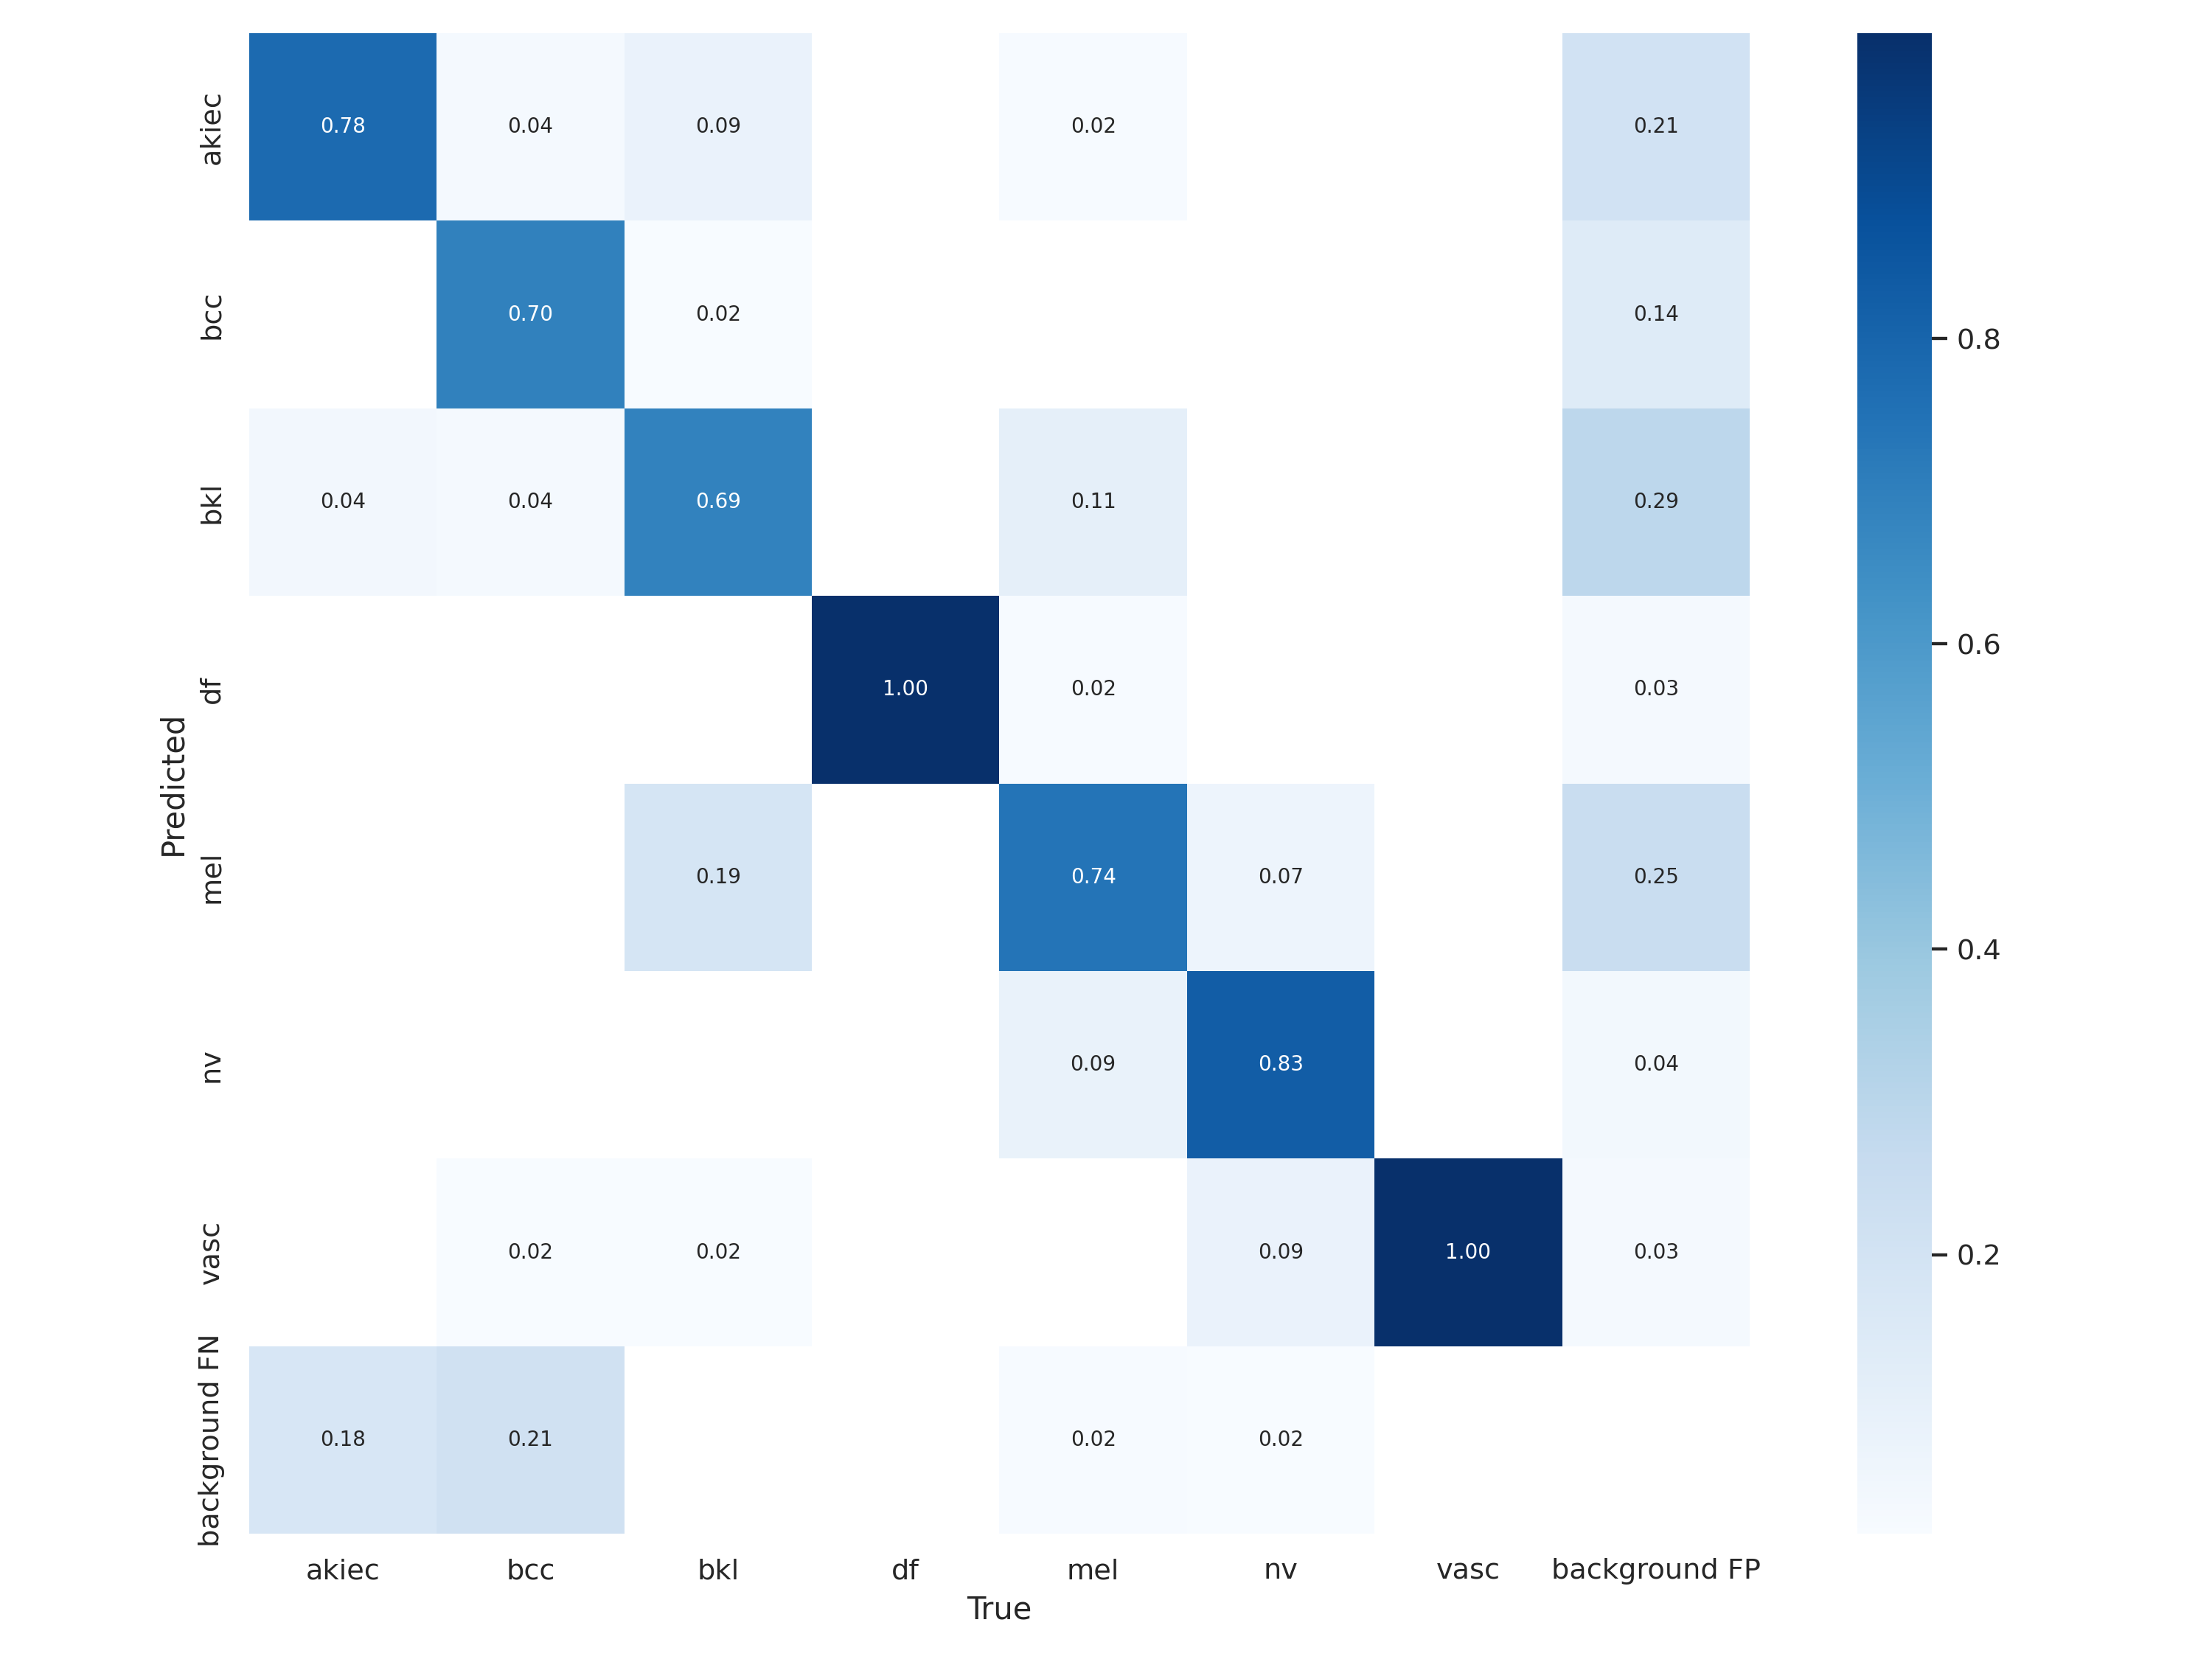

In [22]:
Image(filename=f'/content/runs/test/exp4/confusion_matrix.png', width=600)

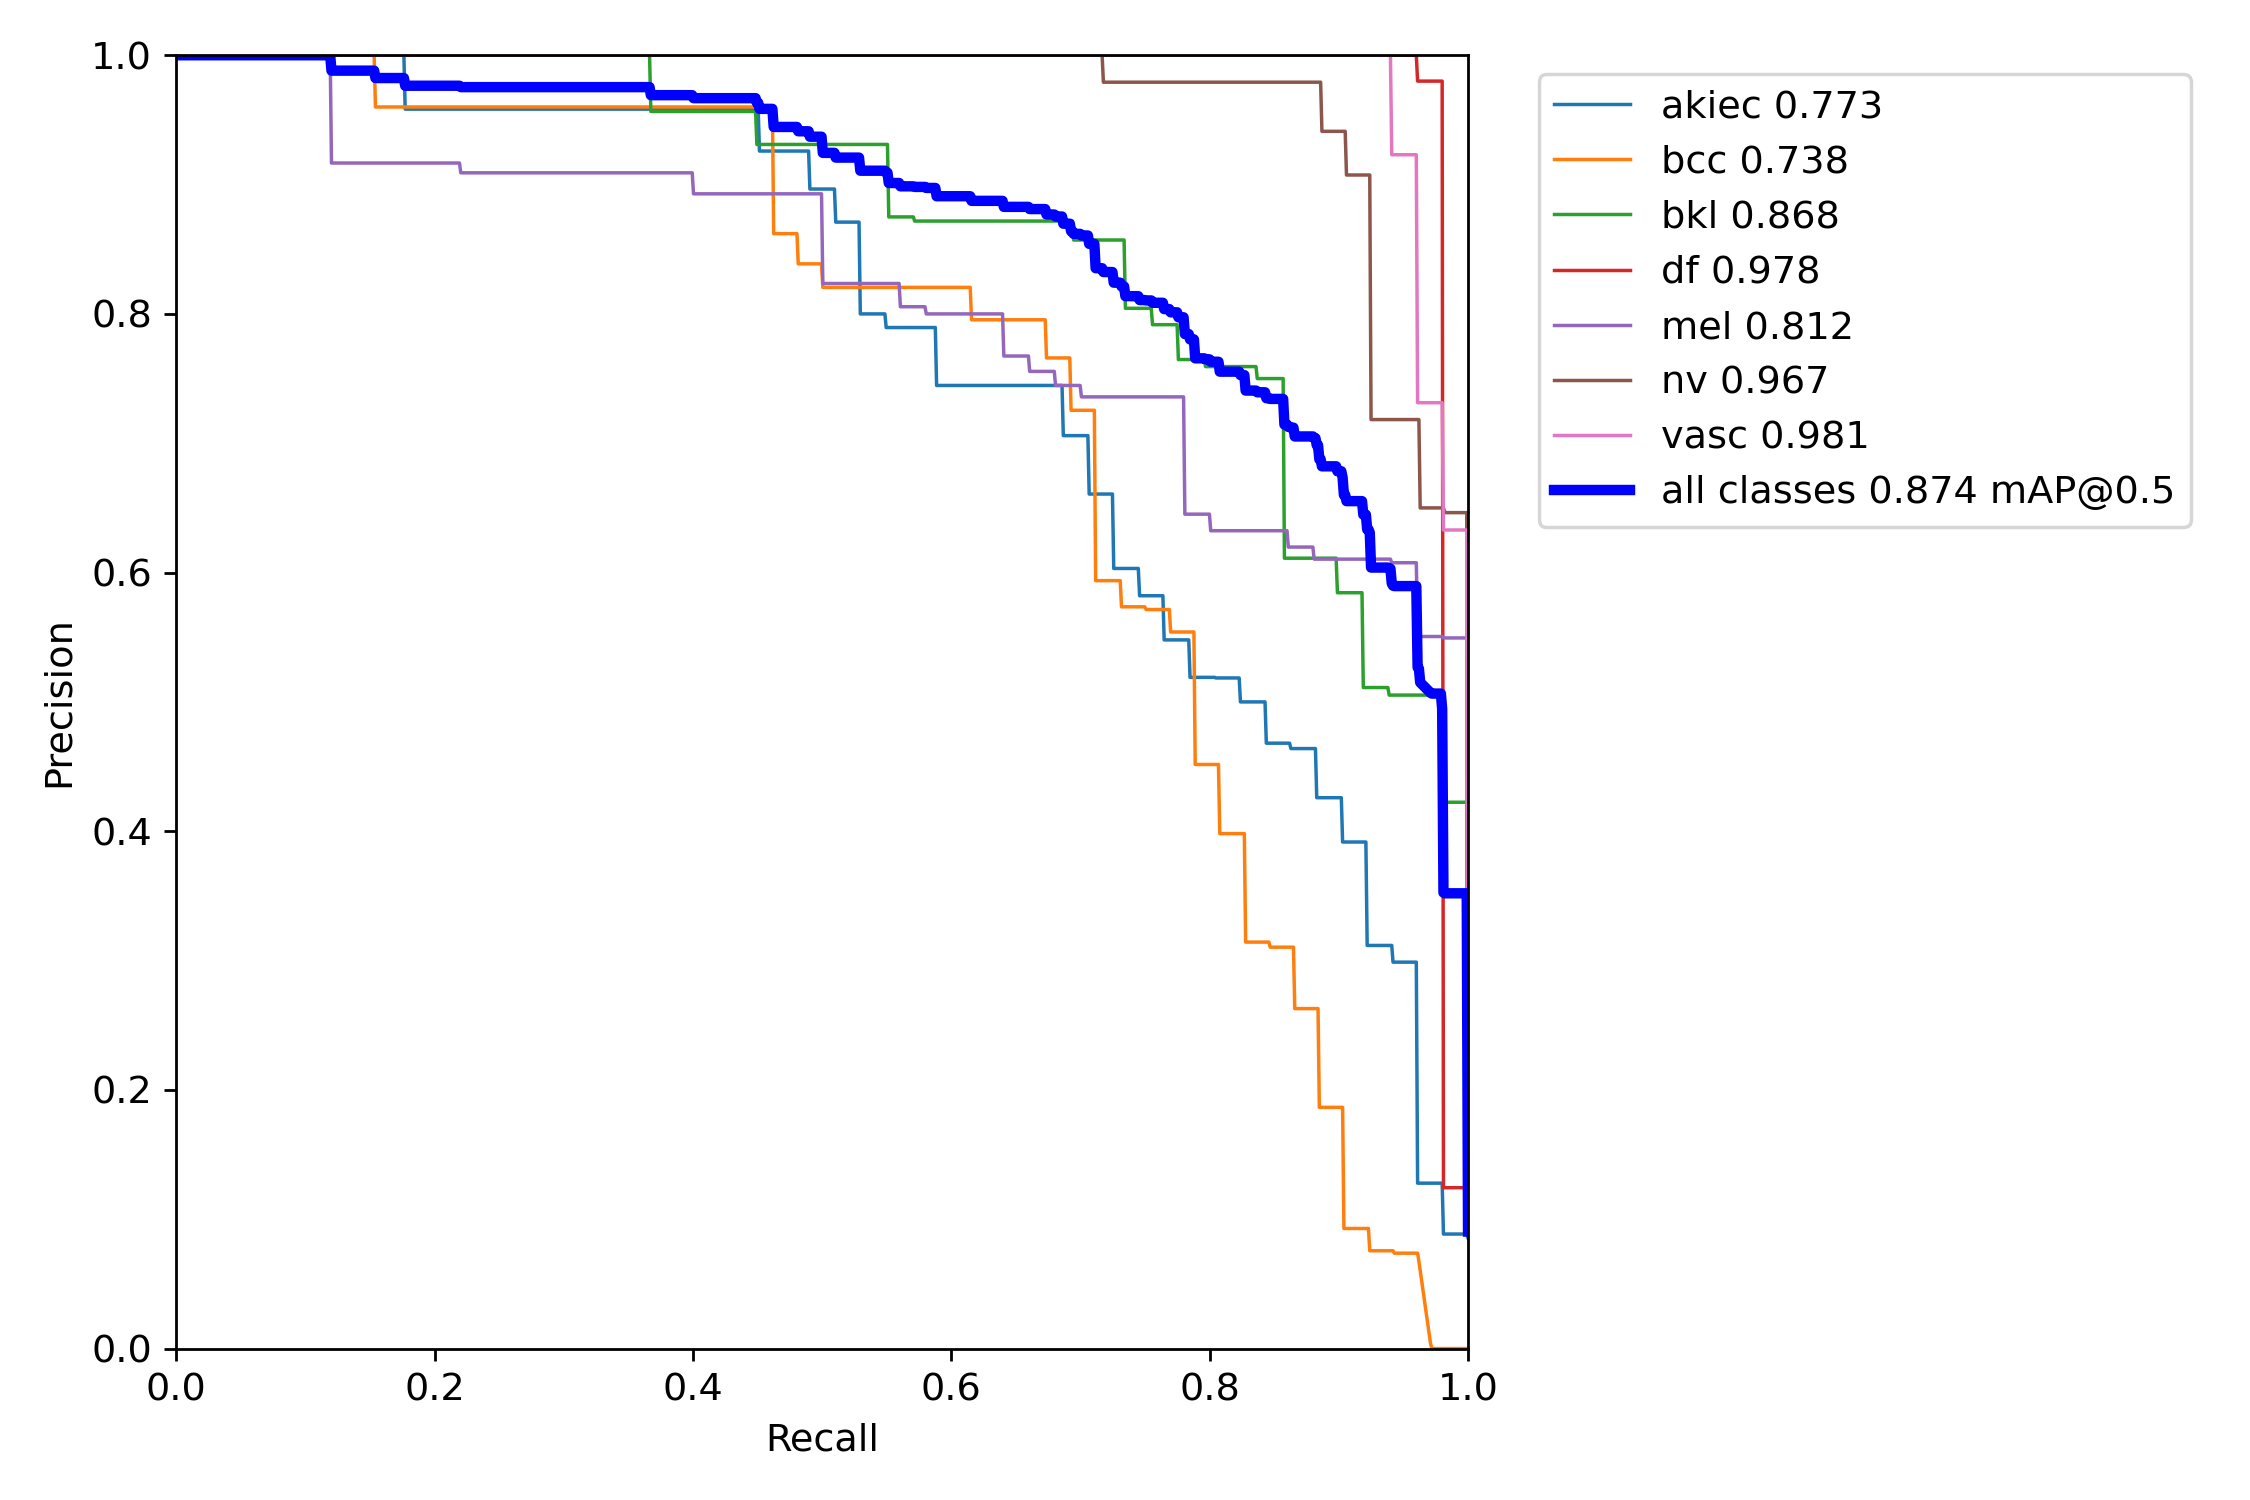

In [23]:
Image(filename=f'/content/runs/test/exp4/PR_curve.png', width=600)

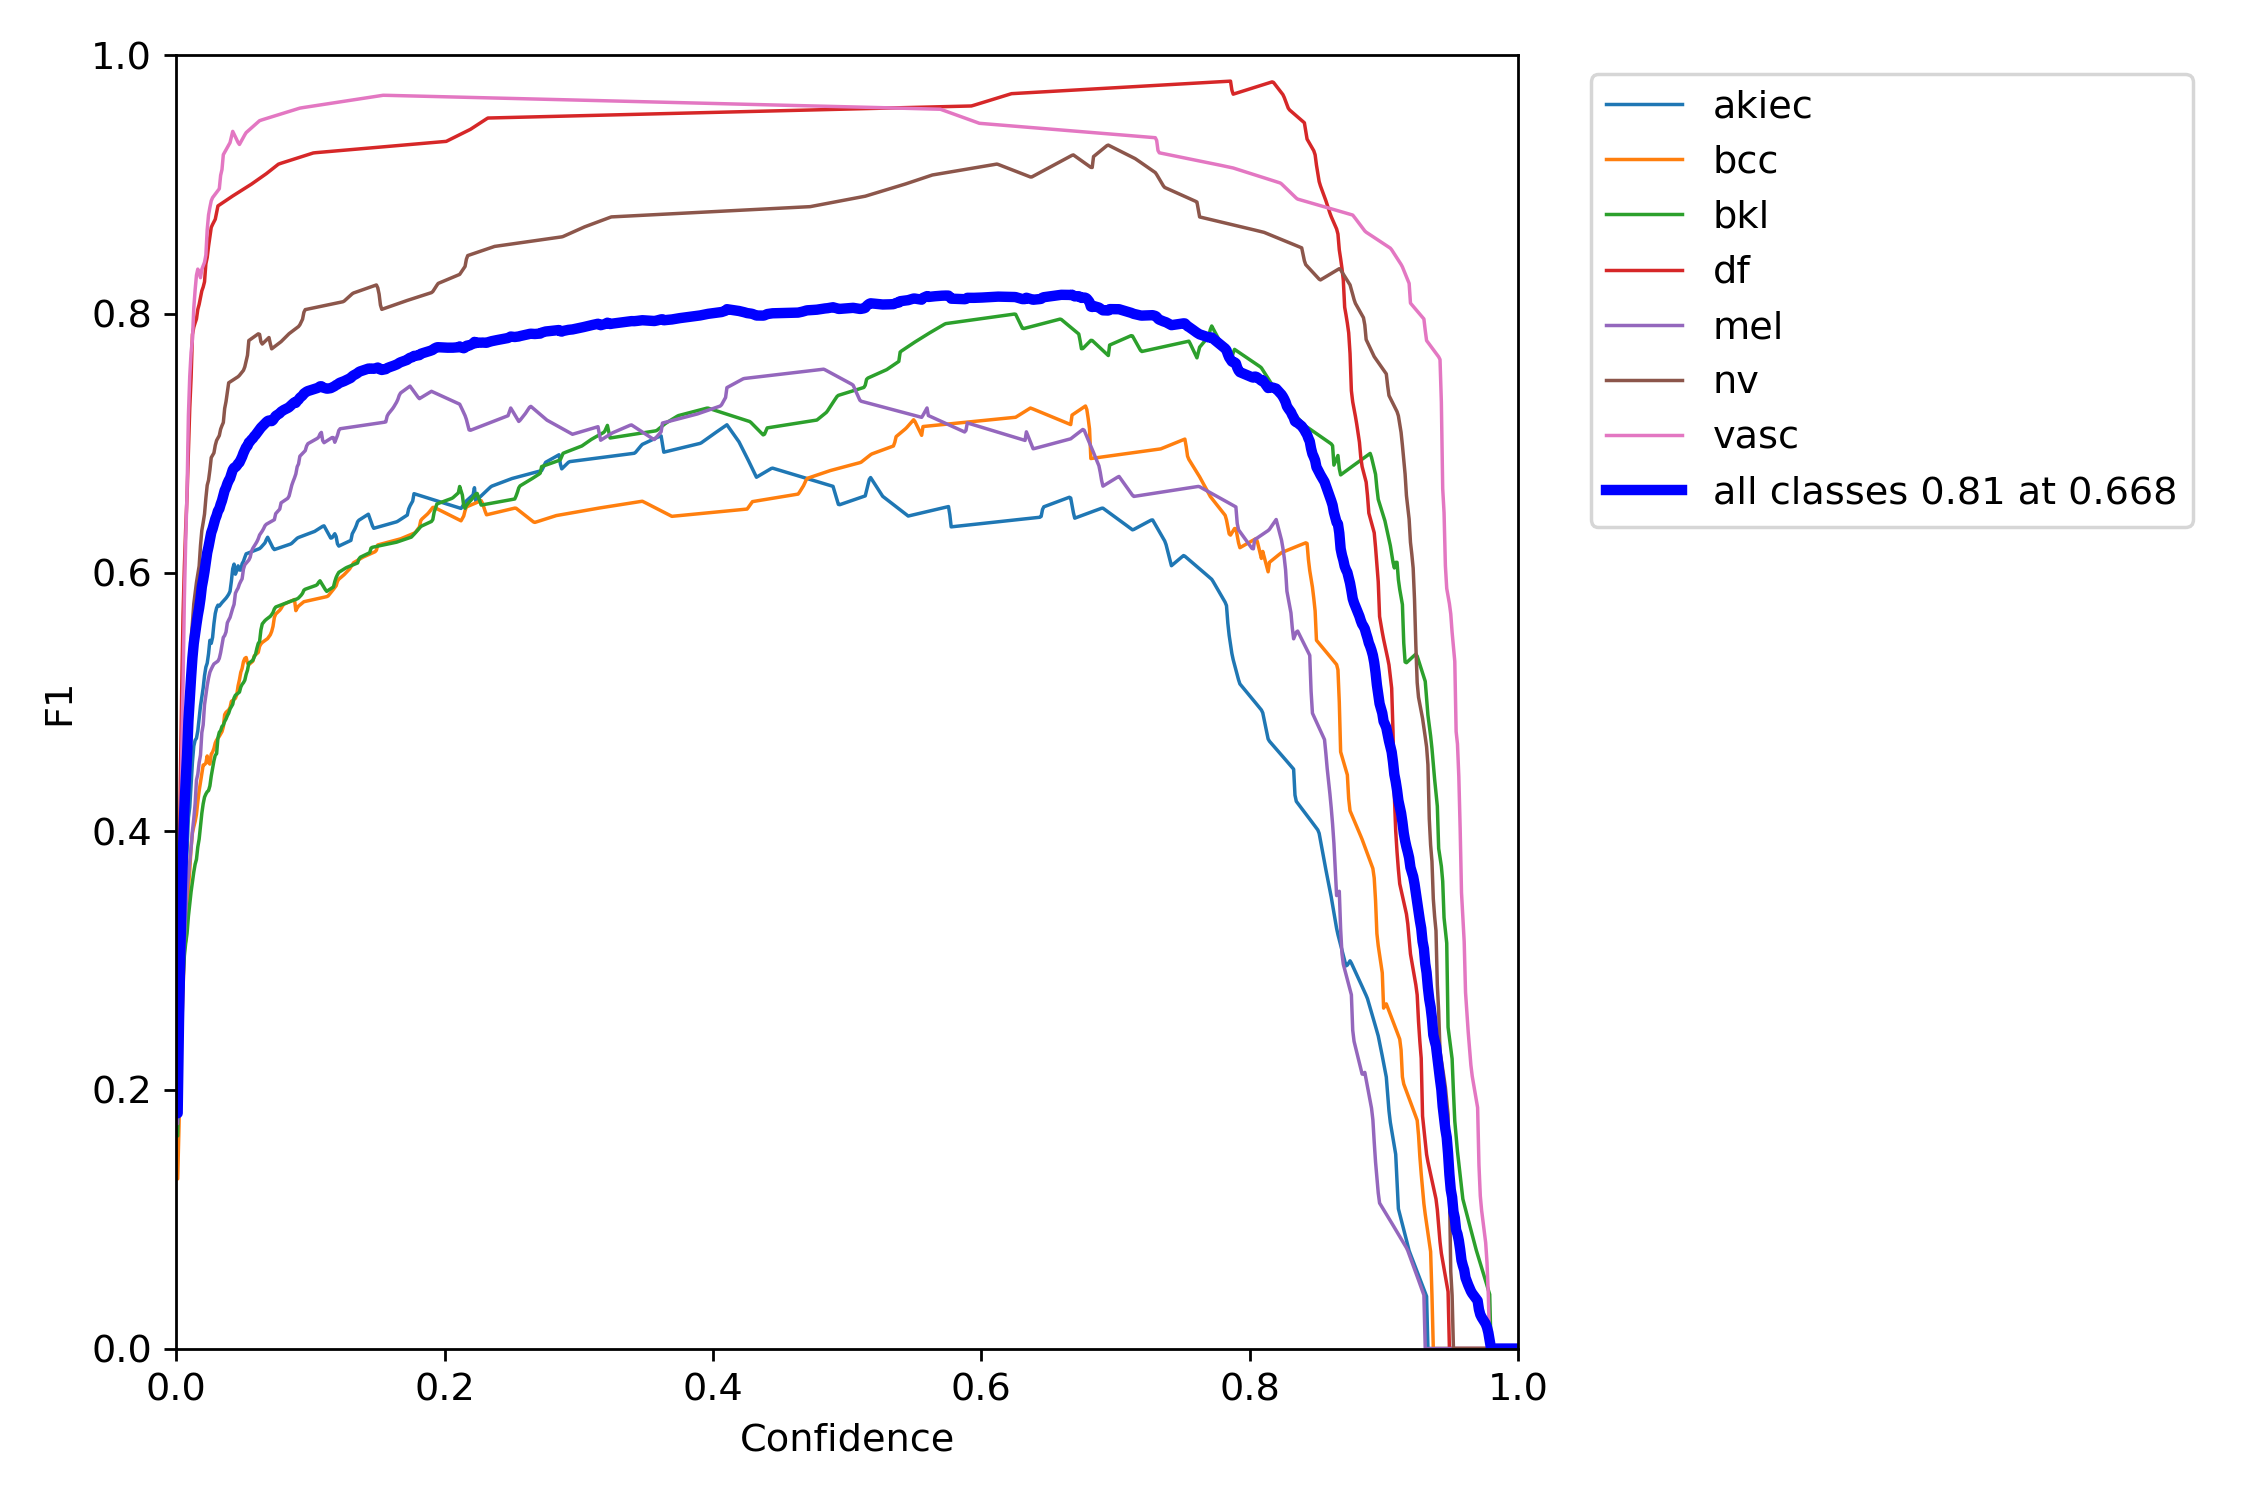

In [24]:
Image(filename=f'/content/runs/test/exp4/F1_curve.png', width=600)

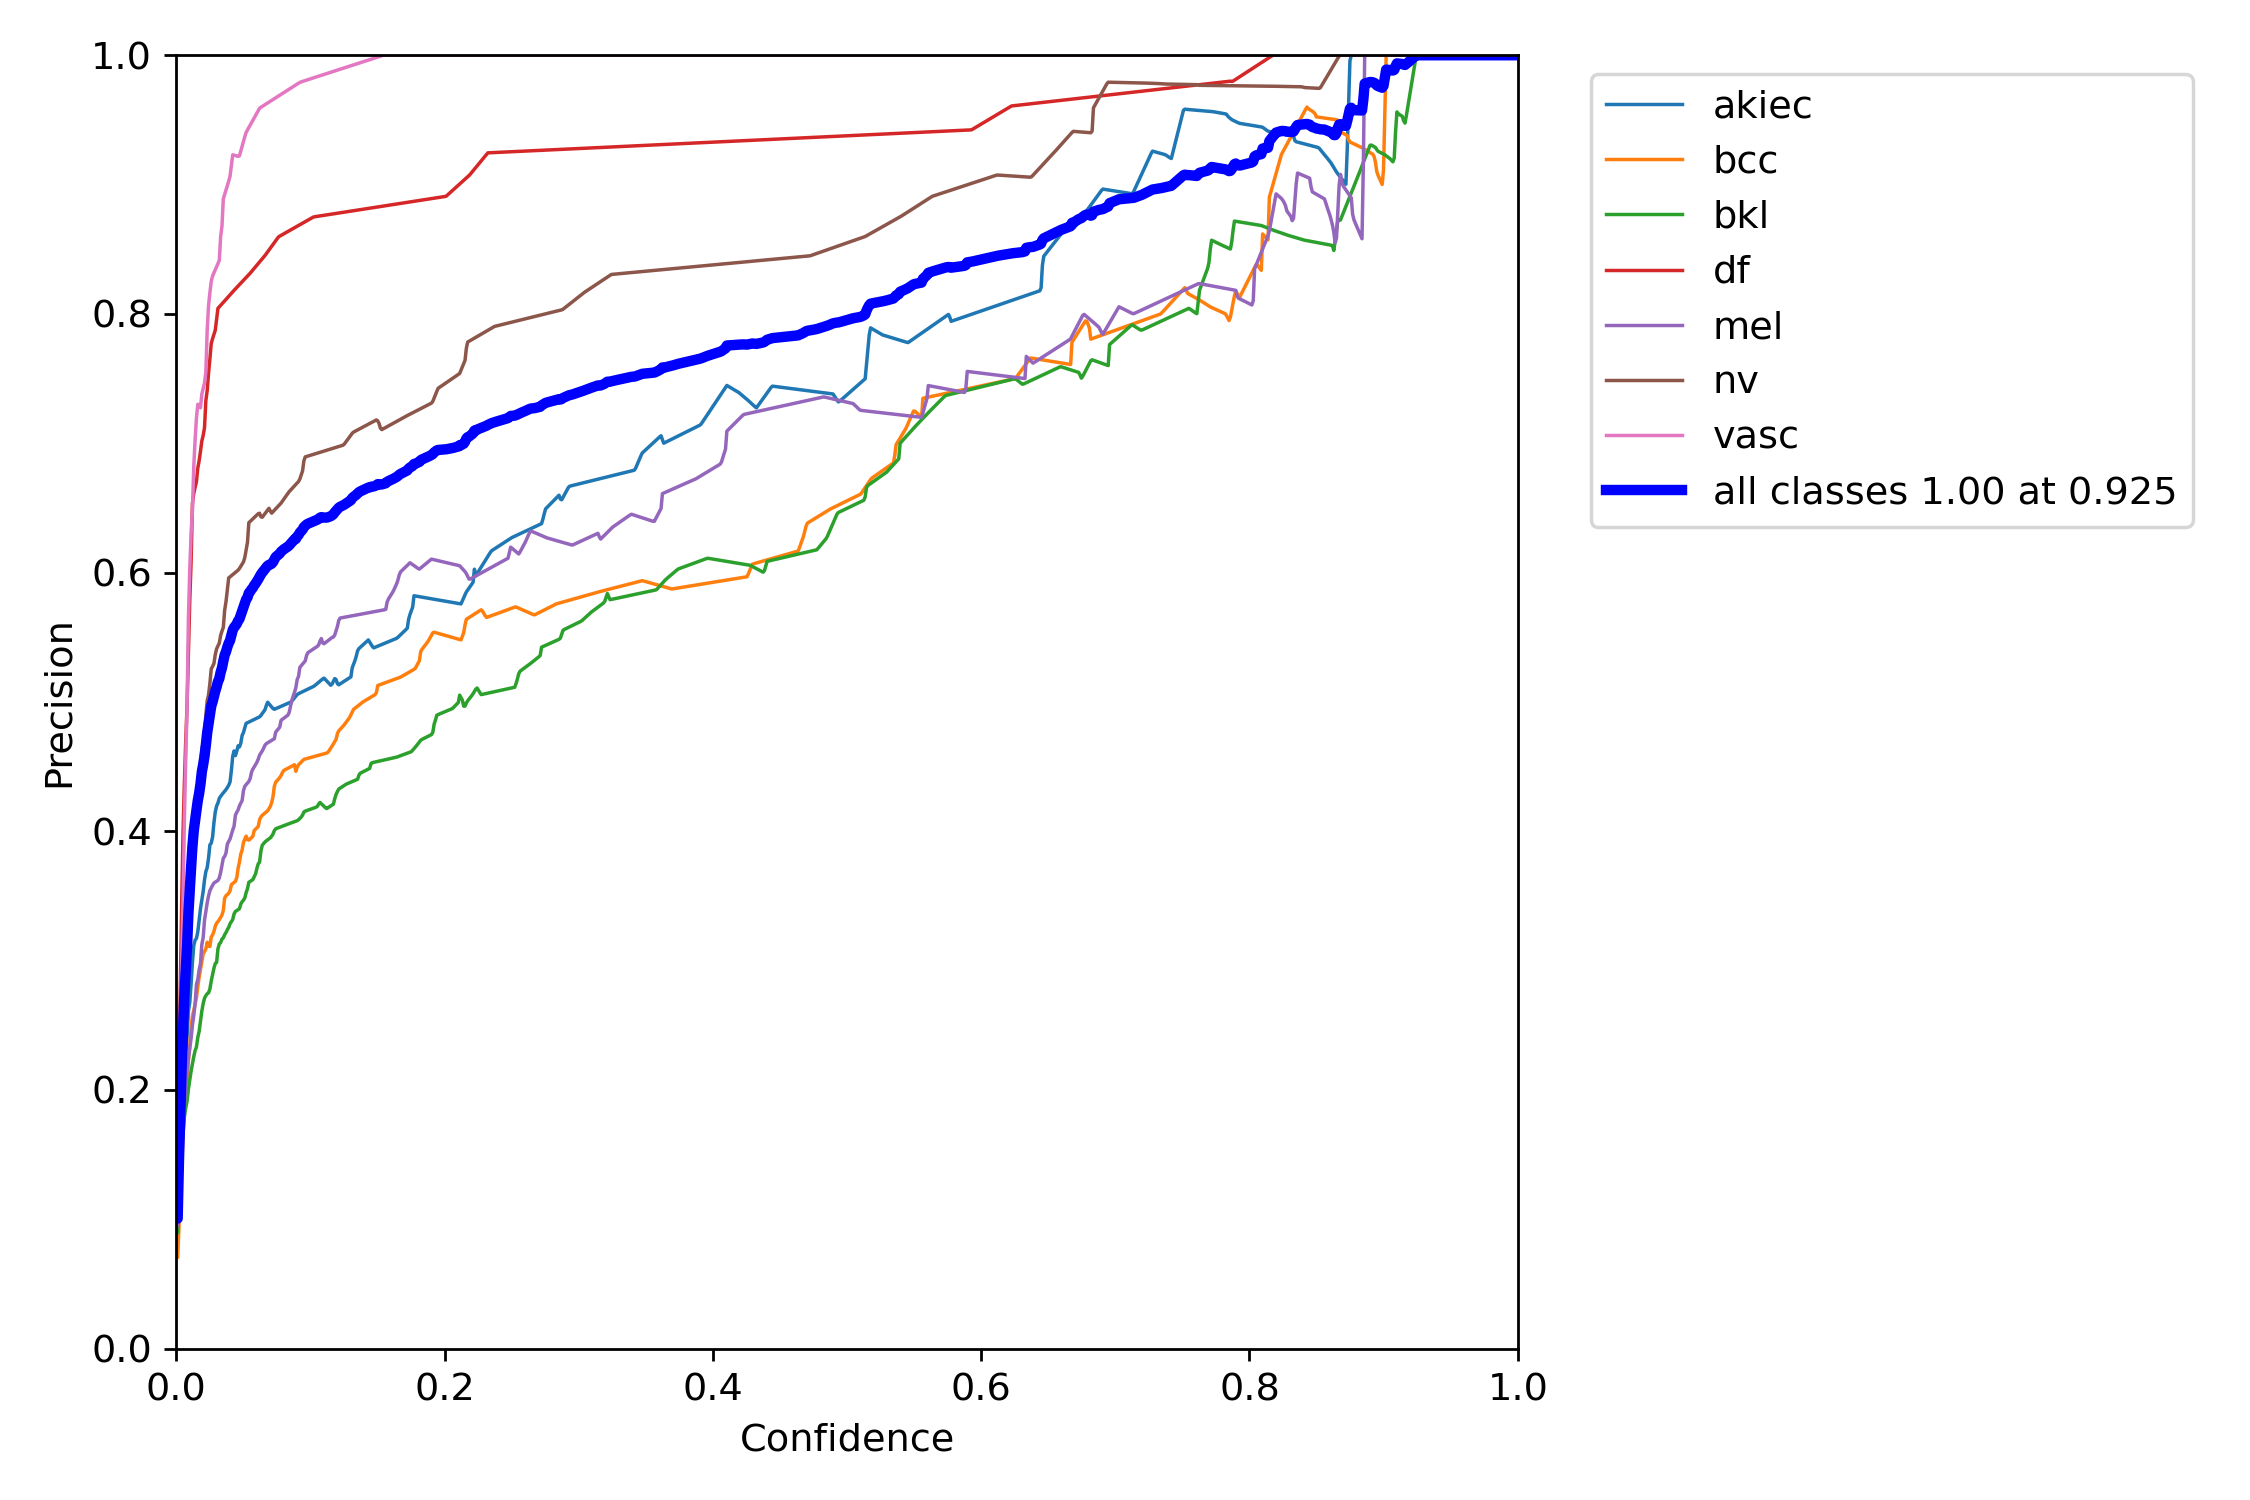

In [28]:
Image(filename=f'/content/runs/test/exp4/P_curve.png', width=600)

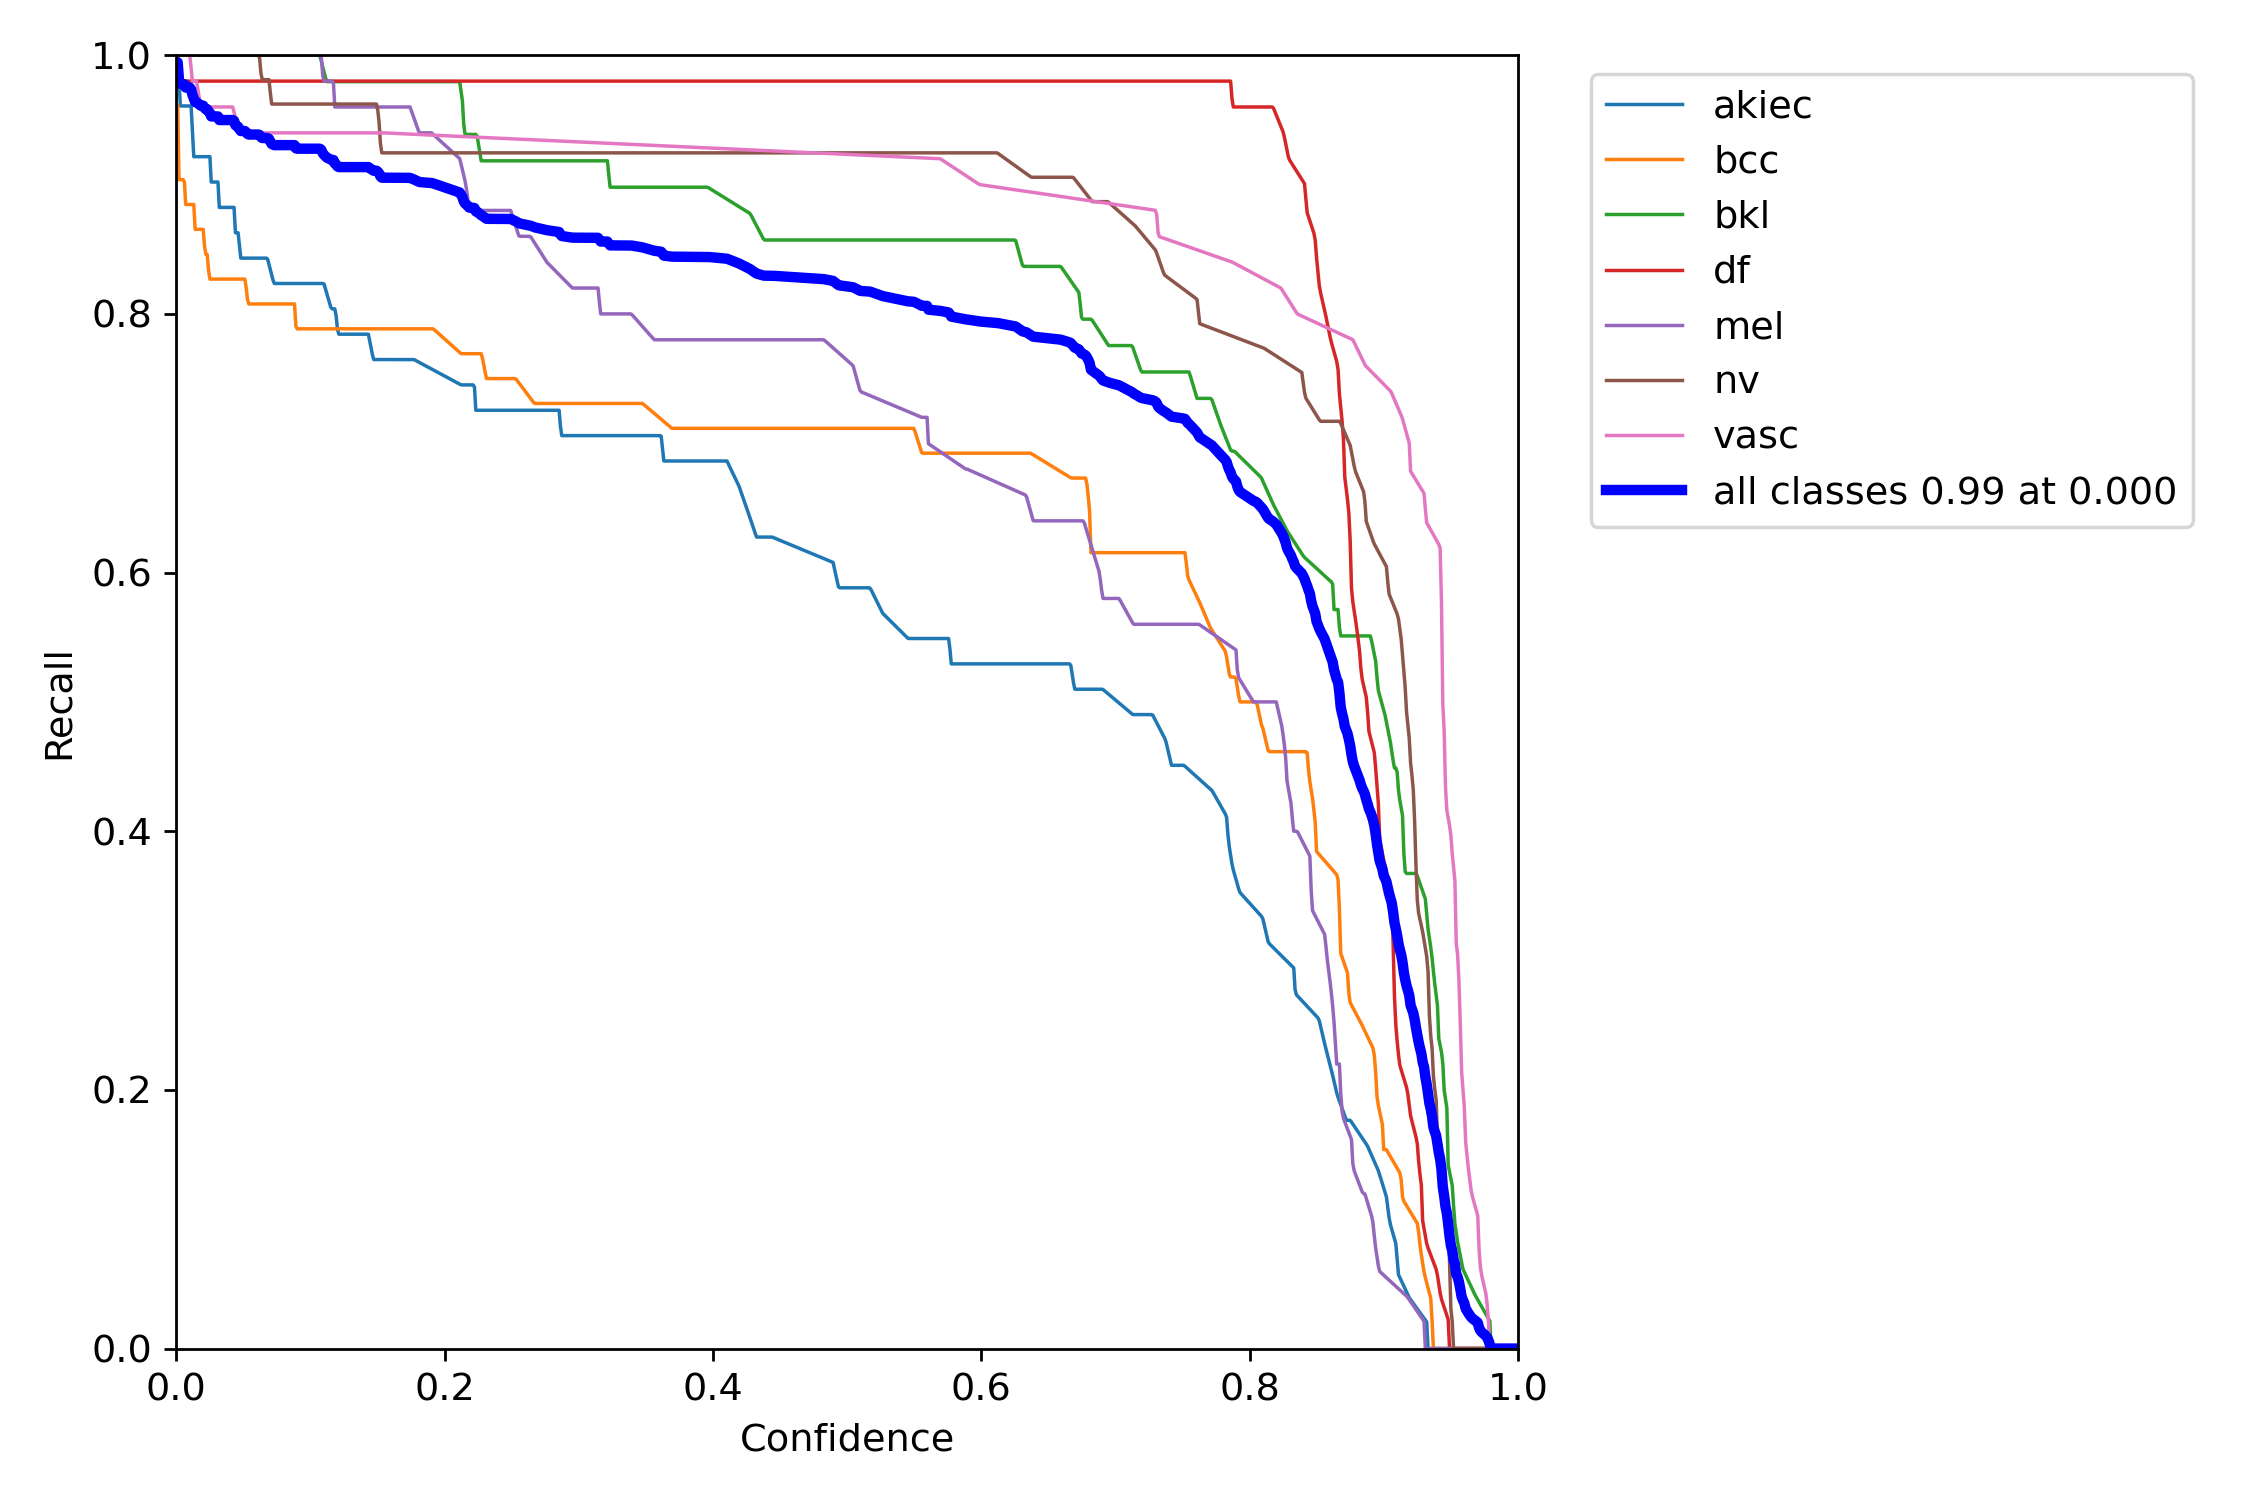

In [29]:
Image(filename=f'/content/runs/test/exp4/R_curve.png', width=600)

In [15]:
import shutil

folder_path = '/content/runs/'
zip_file_name = '/content/YoloV7.zip'

# Membuat file ZIP
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_path)

print(f"Folder {folder_path} telah di-zip menjadi {zip_file_name}")


Folder /content/runs/ telah di-zip menjadi /content/YoloV7.zip
